**Instituto de Informática - UFG**

Disciplina: Inteligência Artificial

Prof. Cedric Luiz de Carvalho


Grupo

---


Analista de dados: 
Isabela Felix França

---

Engenheiro de conhecimento: 
Daniel Campos da Silva

---


## Sobre os dados

Apesar do repositório da UCI contê-los, estes podem ser encontrados diretamente na bibliota do sklearn.

In [46]:
# Os dados estão sem colunas, então vamos ter que setar

import pandas as pd 
cancer_dada = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/breast-cancer-wisconsin.data', sep = ',', header=0)
cancer_dada.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 698 entries, 0 to 697
Data columns (total 11 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   1000025  698 non-null    int64 
 1   5        698 non-null    int64 
 2   1        698 non-null    int64 
 3   1.1      698 non-null    int64 
 4   1.2      698 non-null    int64 
 5   2        698 non-null    int64 
 6   1.3      698 non-null    object
 7   3        698 non-null    int64 
 8   1.4      698 non-null    int64 
 9   1.5      698 non-null    int64 
 10  2.1      698 non-null    int64 
dtypes: int64(10), object(1)
memory usage: 60.1+ KB


In [47]:
cancer_dada.columns = ['Sample code number', 'Clump Thickness', 'Uniformity of Cell Size', 'Uniformity of Cell Shape', 'Marginal Adhesion', 'Single Epithelial Cell Size', 
                       'Bare Nuclei', 'Bland Chromatin', 'Normal Nucleoli', 'Mitoses', 'Class']
cancer_dada

,Sample code number,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,1002945,5,4,4,5,7,10,3,2,1,2
1,1015425,3,1,1,1,2,2,3,1,1,2
2,1016277,6,8,8,1,3,4,3,7,1,2
3,1017023,4,1,1,3,2,1,3,1,1,2
4,1017122,8,10,10,8,7,10,9,7,1,4
...,...,...,...,...,...,...,...,...,...,...,...
693,776715,3,1,1,1,3,2,1,1,1,2
694,841769,2,1,1,1,2,1,1,1,1,2
695,888820,5,10,10,3,7,3,8,10,2,4
696,897471,4,8,6,4,3,4,10,6,1,4


In [48]:
cancer_dada.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 698 entries, 0 to 697
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Sample code number           698 non-null    int64 
 1   Clump Thickness              698 non-null    int64 
 2   Uniformity of Cell Size      698 non-null    int64 
 3   Uniformity of Cell Shape     698 non-null    int64 
 4   Marginal Adhesion            698 non-null    int64 
 5   Single Epithelial Cell Size  698 non-null    int64 
 6   Bare Nuclei                  698 non-null    object
 7   Bland Chromatin              698 non-null    int64 
 8   Normal Nucleoli              698 non-null    int64 
 9   Mitoses                      698 non-null    int64 
 10  Class                        698 non-null    int64 
dtypes: int64(10), object(1)
memory usage: 60.1+ KB


In [49]:
#Validando o que se encontra no tipo objeto

cancer_dada['Bare Nuclei'].unique()

array(['10', '2', '4', '1', '3', '9', '7', '?', '5', '8', '6'],
      dtype=object)

In [50]:
#Será deletado o caracter ?
cancer_dada = cancer_dada[cancer_dada['Bare Nuclei'] != '?']
cancer_dada.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 682 entries, 0 to 697
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Sample code number           682 non-null    int64 
 1   Clump Thickness              682 non-null    int64 
 2   Uniformity of Cell Size      682 non-null    int64 
 3   Uniformity of Cell Shape     682 non-null    int64 
 4   Marginal Adhesion            682 non-null    int64 
 5   Single Epithelial Cell Size  682 non-null    int64 
 6   Bare Nuclei                  682 non-null    object
 7   Bland Chromatin              682 non-null    int64 
 8   Normal Nucleoli              682 non-null    int64 
 9   Mitoses                      682 non-null    int64 
 10  Class                        682 non-null    int64 
dtypes: int64(10), object(1)
memory usage: 63.9+ KB


In [51]:
# Transformação do tipo objeto para um melhor trabalho com os valores

cancer_dada["Bare Nuclei"] = cancer_dada["Bare Nuclei"].astype(str).astype(int)
cancer_dada.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 682 entries, 0 to 697
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype
---  ------                       --------------  -----
 0   Sample code number           682 non-null    int64
 1   Clump Thickness              682 non-null    int64
 2   Uniformity of Cell Size      682 non-null    int64
 3   Uniformity of Cell Shape     682 non-null    int64
 4   Marginal Adhesion            682 non-null    int64
 5   Single Epithelial Cell Size  682 non-null    int64
 6   Bare Nuclei                  682 non-null    int64
 7   Bland Chromatin              682 non-null    int64
 8   Normal Nucleoli              682 non-null    int64
 9   Mitoses                      682 non-null    int64
 10  Class                        682 non-null    int64
dtypes: int64(11)
memory usage: 63.9 KB


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


Os dados não possuem variáveis nulas. Então será apenas trabalhar nos dados. De antemão sabemos que Sample code number é apenas um id. Portanto o valor será deletado.

In [ ]:
cancer_dada = cancer_dada.drop(['Sample code number'], axis=1)

In [55]:
cancer_dada

,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,5,4,4,5,7,10,3,2,1,2
1,3,1,1,1,2,2,3,1,1,2
2,6,8,8,1,3,4,3,7,1,2
3,4,1,1,3,2,1,3,1,1,2
4,8,10,10,8,7,10,9,7,1,4
...,...,...,...,...,...,...,...,...,...,...
693,3,1,1,1,3,2,1,1,1,2
694,2,1,1,1,2,1,1,1,1,2
695,5,10,10,3,7,3,8,10,2,4
696,4,8,6,4,3,4,10,6,1,4


In [64]:
trocar_valor_classe = {2: 0, 4: 1}

cancer_dada['Class'].replace(trocar_valor_classe, inplace=True)
cancer_dada

,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,5,4,4,5,7,10,3,2,1,0
1,3,1,1,1,2,2,3,1,1,0
2,6,8,8,1,3,4,3,7,1,0
3,4,1,1,3,2,1,3,1,1,0
4,8,10,10,8,7,10,9,7,1,1
...,...,...,...,...,...,...,...,...,...,...
693,3,1,1,1,3,2,1,1,1,0
694,2,1,1,1,2,1,1,1,1,0
695,5,10,10,3,7,3,8,10,2,1
696,4,8,6,4,3,4,10,6,1,1


In [65]:
cancer_dada.describe()

,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
count,682.000000,682.000000,682.000000,682.000000,682.000000,682.000000,682.000000,682.000000,682.000000,682.000000
mean,4.441349,3.153959,3.218475,2.832845,3.236070,3.548387,3.445748,2.872434,1.604106,0.350440
std,2.822751,3.066285,2.989568,2.865805,2.224214,3.645226,2.451435,3.054065,1.733792,0.477458
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
25%,2.000000,1.000000,1.000000,1.000000,2.000000,1.000000,2.000000,1.000000,1.000000,0.000000
50%,4.000000,1.000000,1.000000,1.000000,2.000000,1.000000,3.000000,1.000000,1.000000,0.000000
75%,6.000000,5.000000,5.000000,4.000000,4.000000,6.000000,5.000000,4.000000,1.000000,1.000000
max,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,1.000000


## Informações sobre o dados

Este banco de dados de câncer de mama foi obtido dos Hospitais da Universidade de Wisconsin por Dr. William H. Wolberg. No decorrer dos tempos, mais dados foram adicionados.

Conforme o [site](http://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+%28Prognostic%29) de retirada dos dados, cada registro representa dados de acompanhamento de um caso de câncer de mama. Estes são pacientes consecutivos atendidos pelo Dr. Wolberg desde 1984, e incluem apenas os casos que apresentam câncer de mama invasivo e nenhuma evidência de metástases à distância no momento do diagnóstico.

No decorrer de coletas e trabalhos nos dados, mais dados foram acrescentados, assim como, características foram retiradas.

Os dados finais, resultaram, em 682 instânciais e 10 atributos. Estes são:

   * *Clump Thickness*/Espessura do aglomerado 
   * *Uniformity of Cell Size*/Uniformidade do Tamanho da Célula
   * *Uniformity of Cell Shape*/Uniformidade da Forma da Célula
   * *Marginal Adhesion*/Adesão Marginal
   * *Single Epithelial Cell Size*/Tamanho de célula epitelial única
   * *Bare Nuclei*/Núcleos nus
   * *Bland Chromatin*/Cromatina suave
   * *Normal Nucleoli*/Nucléolos normais
   * *Mitoses*/Mitoses
   * *Class*/Classe

## Analisando a quantidade de tumores

In [73]:
benigno = cancer_dada[cancer_dada['Class'] == 0]
maligno = cancer_dada[cancer_dada['Class'] == 1]

In [74]:
benigno

,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,5,4,4,5,7,10,3,2,1,0
1,3,1,1,1,2,2,3,1,1,0
2,6,8,8,1,3,4,3,7,1,0
3,4,1,1,3,2,1,3,1,1,0
5,1,1,1,1,2,10,3,1,1,0
...,...,...,...,...,...,...,...,...,...,...
689,1,1,1,3,2,1,1,1,1,0
691,3,1,1,1,2,1,1,1,1,0
692,3,1,1,1,2,1,2,1,2,0
693,3,1,1,1,3,2,1,1,1,0


In [75]:
maligno

,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
4,8,10,10,8,7,10,9,7,1,1
11,5,3,3,3,2,3,4,4,1,1
13,8,7,5,10,7,9,5,5,4,1
14,7,4,6,4,6,1,4,3,1,1
17,10,7,7,6,4,10,4,1,2,1
...,...,...,...,...,...,...,...,...,...,...
680,5,10,10,10,4,10,5,6,3,1
690,5,10,10,5,4,5,4,4,1,1
695,5,10,10,3,7,3,8,10,2,1
696,4,8,6,4,3,4,10,6,1,1


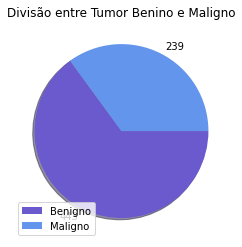

In [69]:
import matplotlib.pyplot as plt

values = [443, 239]
colors = ['#6A5ACD', '#6495ED']
labels = ['Benigno', 'Maligno']
plt.pie(values, colors=colors, labels=values, counterclock=False, shadow=True)
plt.title('Divisão entre Tumor Benino e Maligno')
plt.legend(labels,loc=3)
plt.show()

Apenas 35% dos tumores são maligno.

# Dados Gerais

* Total de dados: 682
* Total de tumores malignos: 239
* Total de tumores benignos: 443

# Analisando relação entre os atributos

In [ ]:
gerar_hit = maligno.drop(['Class'], axis=1)

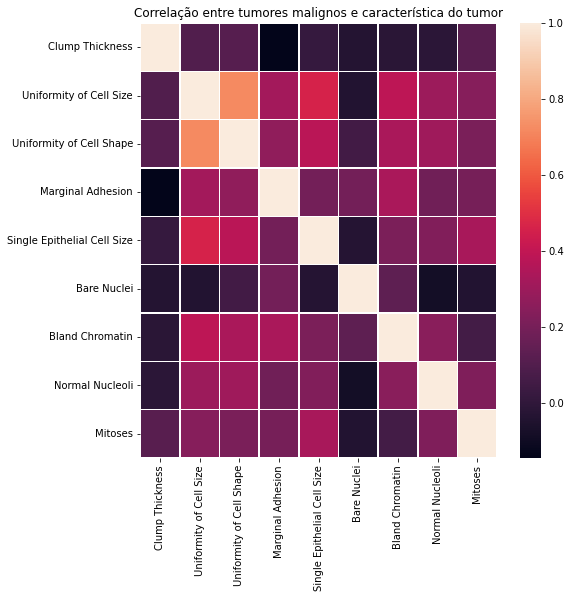

In [77]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(8,8)) 
maligno = gerar_hit.loc[:, gerar_hit.dtypes=='int64'].corr()
heatmap_tumor = sns.heatmap(maligno, xticklabels=maligno.columns, yticklabels=maligno.columns, ax=ax, linewidths=.5)
ax.set_title("Correlação entre tumores malignos e característica do tumor")
plt.show()

# Resultados

Concluímos que o único atributo que ddeve ser excluído é o id. Também é possível observar uma forte relação entre os dados, podendo destacar:

* Clump Thickness possui relação com todos os valores, sendo a mais forte para Marginal Adhesion;
* Bare Nuclei possui uma relação mais forte com Uniformity of Sell Size e Shape, Single Epithelial Cell Size Normal Nucleoli, Mitoses.

Portanto, com todos atributos relacionando entre si, concluí-se que foi inteligente a não exclusão de mais atributos.